In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('position_salary.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values
Y = np.reshape(Y, (-1, 1))

In [3]:
x_std_scaler = StandardScaler()
y_std_scaler = StandardScaler()

X = x_std_scaler.fit_transform(X)
Y = y_std_scaler.fit_transform(Y)

In [4]:
regressor = SVR(kernel='rbf')
regressor.fit(X, np.ravel(Y))

SVR()

In [5]:
y_pred_scaled = regressor.predict(x_std_scaler.transform([[6.5]]))
y_pred = y_std_scaler.inverse_transform(y_pred_scaled)

In [6]:
x_std_scaler.inverse_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

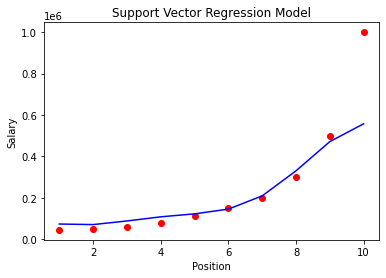

In [7]:
x_unscaled = x_std_scaler.inverse_transform(X)
y_unscaled = y_std_scaler.inverse_transform(Y)

plt.scatter(x_unscaled, y_unscaled, color='red')
plt.plot(x_unscaled, y_std_scaler.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Support Vector Regression Model')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

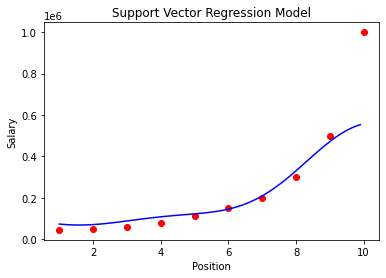

In [8]:
x_grid = np.arange(min(x_unscaled), max(x_unscaled), 0.1)
x_grid = x_grid.reshape(-1, 1)
x_grid_scaled = x_std_scaler.transform(x_grid)

plt.scatter(x_unscaled, y_unscaled, color='red')
plt.plot(x_grid, y_std_scaler.inverse_transform(regressor.predict(x_grid_scaled)) , color='blue')
plt.title('Support Vector Regression Model')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()